You are given the root of a binary tree with unique values, and an integer start. At minute 0, an infection starts from the node with value start.

Each minute, a node becomes infected if:

    The node is currently uninfected.
    The node is adjacent to an infected node.

Return the number of minutes needed for the entire tree to be infected.

 

Example 1:

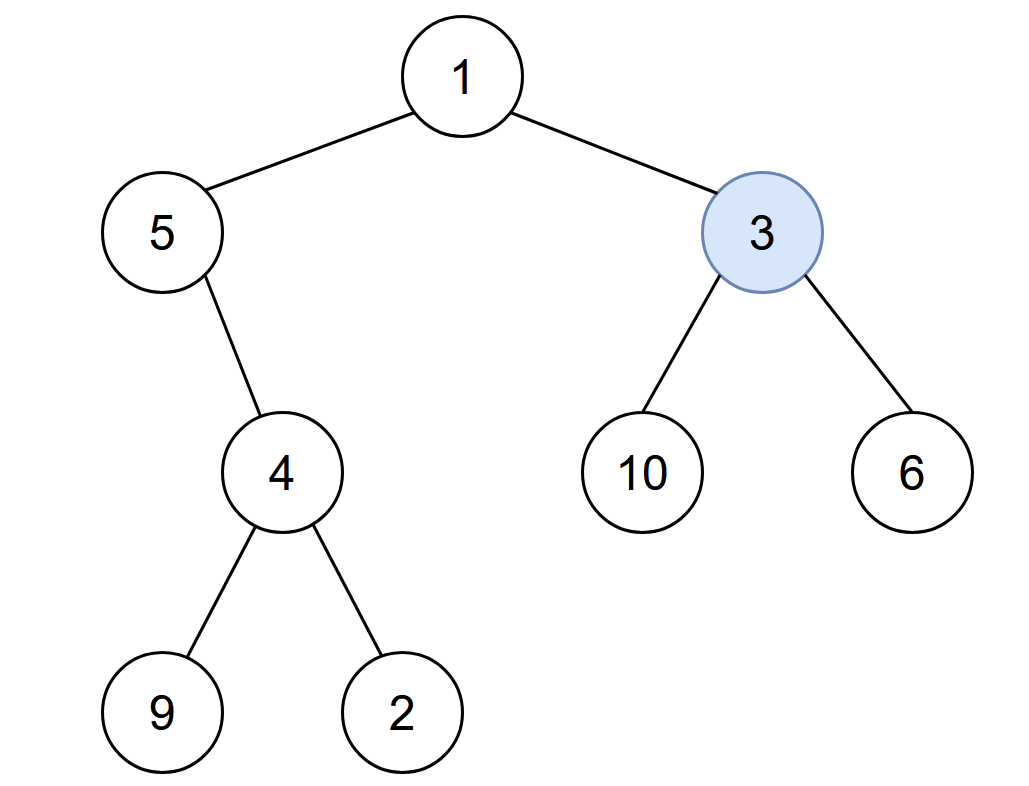

Input: root = [1,5,3,null,4,10,6,9,2], start = 3
Output: 4
Explanation: The following nodes are infected during:
- Minute 0: Node 3
- Minute 1: Nodes 1, 10 and 6
- Minute 2: Node 5
- Minute 3: Node 4
- Minute 4: Nodes 9 and 2
It takes 4 minutes for the whole tree to be infected so we return 4.

Example 2:

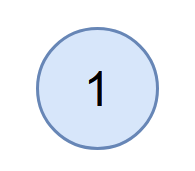

Input: root = [1], start = 1
Output: 0
Explanation: At minute 0, the only node in the tree is infected so we return 0.

 

Constraints:

    The number of nodes in the tree is in the range [1, 105].
    1 <= Node.val <= 105
    Each node has a unique value.
    A node with a value of start exists in the tree.



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def amountOfTime(self, root: Optional[TreeNode], start: int) -> int:
        tree_map: Dict[int, Set[int]] = {}
        self.convert(root, 0, tree_map)
        queue = deque([start])
        minute = 0
        visited = {start}

        while queue:
            level_size = len(queue)
            while level_size > 0:
                current = queue.popleft()
                for num in tree_map[current]:
                    if num not in visited:
                        visited.add(num)
                        queue.append(num)
                level_size -= 1
            minute += 1

        return minute - 1

    def convert(self, current: TreeNode, parent: int, tree_map: Dict[int, Set[int]]):
        if current is None:
            return
        if current.val not in tree_map:
            tree_map[current.val] = set()
        adjacent_list = tree_map[current.val]
        if parent != 0:
            adjacent_list.add(parent)
        if current.left:
            adjacent_list.add(current.left.val)
        if current.right:
            adjacent_list.add(current.right.val)
        self.convert(current.left, current.val, tree_map)
        self.convert(current.right, current.val, tree_map)